## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata)
print(study_results)
# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_data.head(10)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
mice_uni=mouse_data["Mouse ID"].unique()
mice_number=len(mice_uni)
mice_number

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse2_data=mouse_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse2_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_rows=mouse_data[mouse_data.duplicated(subset=["Mouse ID","Timepoint"], keep="last")]
duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [9]:
# Checking the number of mice in the clean DataFrame.
number_mice=len(mouse2_data["Mouse ID"].unique())
number_mice

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mice_drugreg=mouse2_data.groupby("Drug Regimen")
mice_drugreg
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_regimen=mouse2_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"mean","median","var","std","sem"})
mice_regimen
# Using the aggregation method, produce the same summary statistics in a single line


,mean,sem,var,std,median
Drug Regimen,,,,,
Capomulin,40.675741,0.329346,24.947764,4.994774,41.557809
Ceftamin,52.591172,0.469821,39.290177,6.268188,51.776157
Infubinol,52.884795,0.492236,43.128684,6.567243,51.820584
Ketapril,55.235638,0.603860,68.553577,8.279709,53.698743
Naftisol,54.331565,0.596466,66.173479,8.134708,52.509285
Placebo,54.033581,0.581331,61.168083,7.821003,52.288934
Propriva,52.393463,0.525862,43.138803,6.568014,50.909965
Ramicane,40.216745,0.320955,23.486704,4.846308,40.673236
Stelasyn,54.233149,0.573111,59.450562,7.710419,52.431737


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# unimice=mice_drugreg["Mouse ID"].value_counts()
# unimice_df=pd.DataFrame(unimice)
# unimice_df=unimice_df.rename(columns={"Mouse ID":"Quantity"})
# unimice_df=unimice_df.reset_index()
# unimice_df.set_index("Mouse ID")
# unimice_df.plot(kind="bar", x="Mouse ID")

Text(0.5, 1.0, 'Mouse quantity for different Drug Regimen')

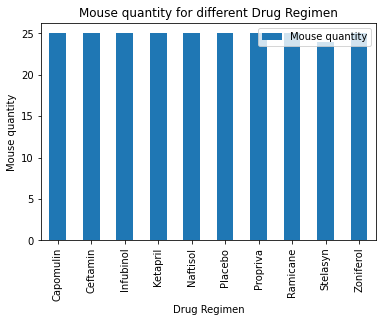

In [13]:
unimice=mice_drugreg.agg({"Mouse ID":"nunique"})
unimice=unimice.rename(columns={"Mouse ID":"Mouse quantity"})
unimice
unimiceplot=unimice.plot(kind="bar")
unimiceplot.set_ylabel("Mouse quantity")
unimiceplot.set_title("Mouse quantity for different Drug Regimen")


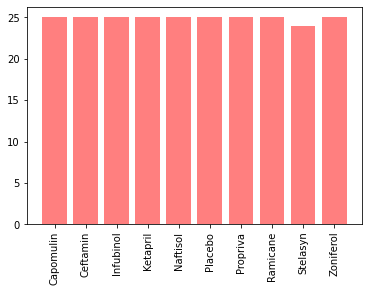

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(unimice.index, unimice["Mouse quantity"], color="r", alpha=0.5)
plt.xticks(rotation=90)
plt.show()

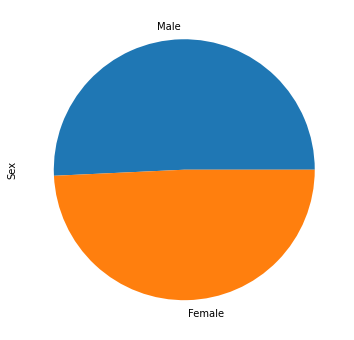

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse2_data["Sex"].value_counts().plot.pie(figsize=(11,6))
plt.show()

([<matplotlib.patches.Wedge at 0x7fdef8b4db80>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.0279521368181973, -1.1996744050146677, 'Female')])

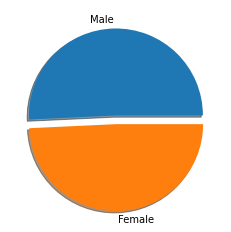

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse2_data.Sex.value_counts(),labels=["Male","Female"],explode=[0,0.1], shadow="True")


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# mouse_last = mouse2_data.loc[(mouse2_data["Timepoint"].max()) &
#                             (
#                             (mouse2_data["Drug Regimen"]=="Capomulin")|
#                             (mouse2_data["Drug Regimen"]=="Ramicane")|
#                             (mouse2_data["Drug Regimen"]=="Infubinol")|
#                             (mouse2_data["Drug Regimen"]=="Ceftamin"))]
# mouse_last

mouse_max=mouse2_data.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
mouse_drug=mouse2_data.loc[(mouse2_data["Drug Regimen"]=="Capomulin")|
                            (mouse2_data["Drug Regimen"]=="Ramicane")|
                            (mouse2_data["Drug Regimen"]=="Infubinol")|
                            (mouse2_data["Drug Regimen"]=="Ceftamin")]
mouse_last=pd.merge(mouse_drug, mouse_max, on=(["Mouse ID","Drug Regimen", "Timepoint"]), how="inner")
mouse_last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=mouse_last["Drug Regimen"].unique()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for tr in treatments:    
    treat=mouse_last.loc[mouse_last["Drug Regimen"]==tr,"Tumor Volume (mm3)"]
    tr_mouse=mouse_last.loc[mouse_last["Drug Regimen"]==tr,["Tumor Volume (mm3)","Mouse ID", "Timepoint","Drug Regimen"]]
    tumor_vol.append(treat)

    quartiles=treat.quantile([0.25,0.5,0.75])
    IQR=quartiles[0.75]-quartiles[0.25]
    upper_bounds=quartiles[0.75]+1.5*IQR
    lower_bounds=quartiles[0.25]-1.5*IQR
    outlier_df=tr_mouse.loc[(tr_mouse["Tumor Volume (mm3)"]>upper_bounds)|(tr_mouse["Tumor Volume (mm3)"]<lower_bounds)]
    if not outlier_df.empty:
        print(outlier_df)
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


    Tumor Volume (mm3) Mouse ID  Timepoint Drug Regimen
58           36.321346     c326          5    Infubinol


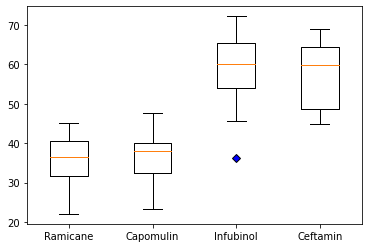

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# plt.boxplot(tumor_vol)
# plt.xticks(ticks=range(1,5),labels=treatments)
fig1,ax1=plt.subplots()
blue_diamond=dict(markerfacecolor="b", marker="D")
ax1.boxplot(tumor_vol, flierprops=blue_diamond)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

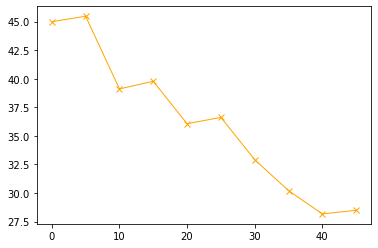

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mice=mouse2_data.loc[(mouse2_data["Drug Regimen"]=="Capomulin") & (mouse2_data["Mouse ID"]=="x401")]
plt.plot(capo_mice["Timepoint"], capo_mice["Tumor Volume (mm3)"], marker="x", color="orange", label="x401",linewidth=1)
plt.show()

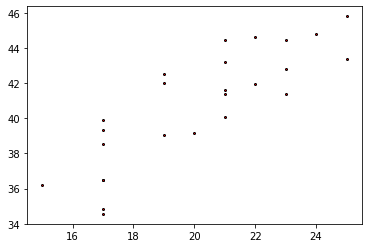

<Figure size 792x720 with 0 Axes>

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_mouse=mouse2_data.loc[mouse2_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").agg({"Tumor Volume (mm3)":"mean", "Weight (g)":"mean"})
capo_mouse=capo_mouse.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume", "Weight (g)":"Average Weight"})
capo_mouse
plt.scatter(capo_mouse["Average Weight"], capo_mouse["Average Tumor Volume"], s=4, edgecolors="black", facecolors="red")
plt.figure(figsize=(11,10))
plt.show()


## Correlation and Regression

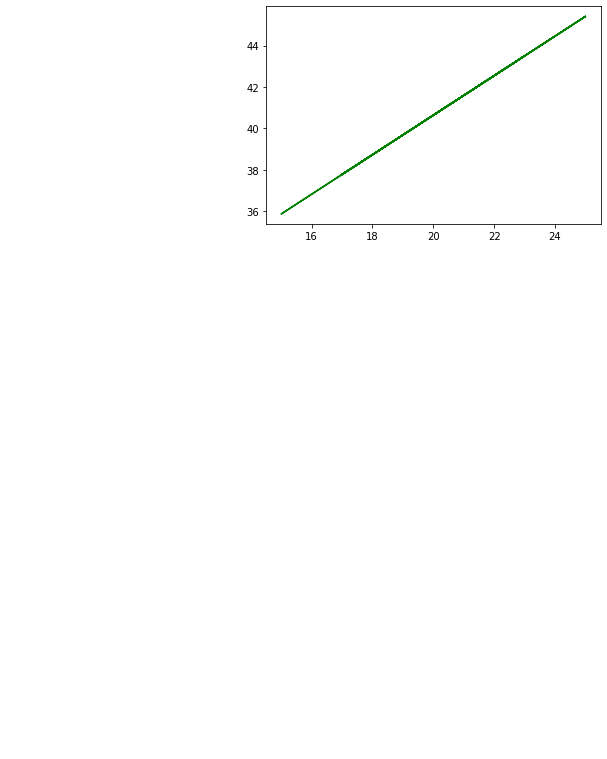

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
out=st.linregress(capo_mouse["Average Weight"], capo_mouse["Average Tumor Volume"])
regress_values=out[0]*capo_mouse["Average Weight"]+out[1]
plt.plot(capo_mouse["Average Weight"], regress_values, color="green")
eq="y="+str(out[0])+"x+"+str(out[1])
plt.annotate(eq, (6,10), fontsize=10, color="orange")
plt.show()